In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
train_data = pd.read_csv("/content/housing.csv")

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
train_data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
# Separating numeric and categorical columns
numeric_columns = train_data.select_dtypes(include=['number']).columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

In [7]:
# Impute missing values in numeric columns with mean.

numeric_imputer = SimpleImputer(strategy='mean')
train_data[numeric_columns] = numeric_imputer.fit_transform(train_data[numeric_columns])

In [8]:
# Impute missing values in categorical columns with most frequent value

categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_columns] = categorical_imputer.fit_transform(train_data[categorical_columns])

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
# Display the first few rows of the dataset
print(train_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [12]:
print(train_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        419.266592   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [13]:
# Check for missing values
print(train_data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [14]:
# Checking for duplicates
duplicates = train_data.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [15]:
#Display the duplicate rows
duplicate_rows = train_data[duplicates]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [16]:
print(train_data.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


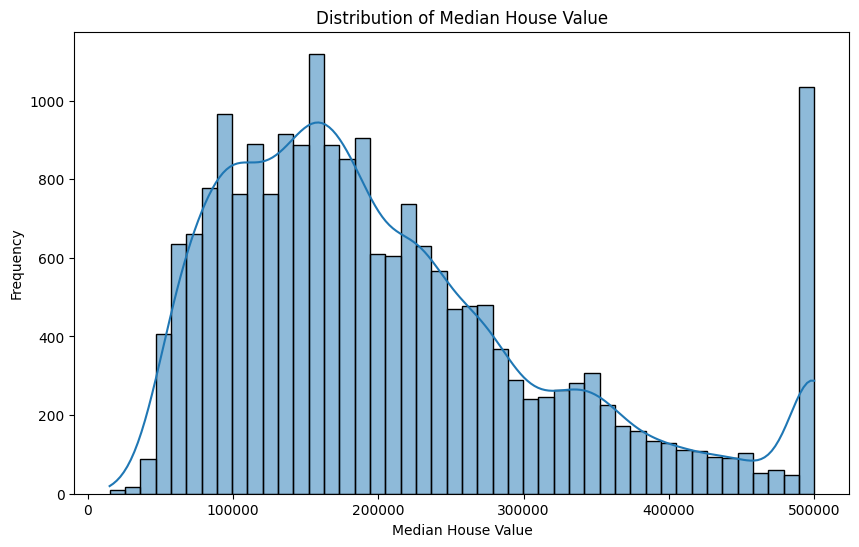

In [17]:
# Visualising the distribution   (house prices)

plt.figure(figsize=(10, 6))
sns.histplot(train_data['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

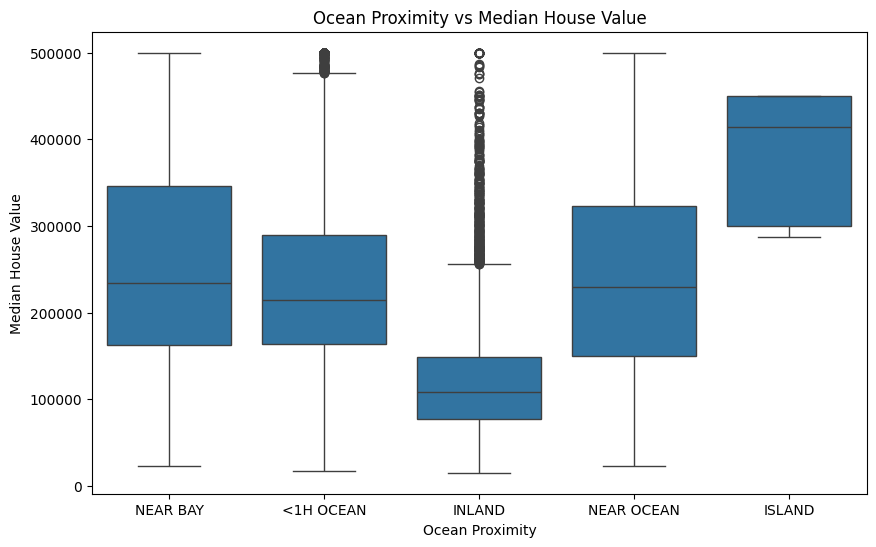

In [18]:
# Visualize the relationship between categorical features and target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=train_data)
plt.title('Ocean Proximity vs Median House Value')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()


In [45]:
from sklearn.model_selection import train_test_split
X = train_data.drop(['median_house_value'], axis=1)
y = train_data['median_house_value']


In [46]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedroom_ratio,household_rooms
15647,-122.41,37.79,52.0,7.975908,6.747587,7.445418,6.722630,3.0296,3,0.845996,1.186427
3414,-118.38,34.27,8.0,8.086103,6.742881,7.866722,6.595781,2.8214,0,0.833885,1.225951
8434,-118.37,33.92,36.0,6.981006,5.288267,6.234411,5.288267,4.9688,0,0.757522,1.320093
14056,-117.13,32.75,31.0,7.756623,6.487684,7.079184,6.413459,2.5872,4,0.836406,1.209429
1890,-120.01,38.93,22.0,8.033009,6.415097,6.952729,6.054439,2.9960,1,0.798592,1.326797
...,...,...,...,...,...,...,...,...,...,...,...
9065,-118.14,34.65,20.0,7.137278,5.308268,6.313548,5.231109,4.6591,1,0.743738,1.364391
8367,-118.35,33.98,33.0,7.541683,6.169611,7.325808,6.109248,3.1194,0,0.818068,1.234470
8349,-118.33,33.94,31.0,8.231642,7.005789,8.098339,6.872128,1.9309,0,0.851080,1.197830
17072,-122.21,37.52,18.0,7.993958,6.852243,7.402452,6.747587,2.7399,3,0.857178,1.184714


In [21]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedroom_ratio,household_rooms
17975,-121.96,37.31,31.0,8.266421,6.568078,7.549083,6.576470,5.2534,0,0.794549,1.256969
10197,-117.94,33.86,35.0,7.662938,6.035481,7.129298,5.937536,4.7500,0,0.787620,1.290592
4402,-118.28,34.09,49.0,8.250359,7.088409,7.959625,6.917706,2.4677,0,0.859164,1.192644
15226,-117.24,33.05,15.0,8.016318,6.320768,7.352441,6.304449,5.3129,4,0.788488,1.271534
3466,-118.47,34.32,13.0,7.887959,6.251904,7.292337,6.257668,4.8988,0,0.792588,1.260527
...,...,...,...,...,...,...,...,...,...,...,...
12918,-121.32,38.64,19.0,9.048057,7.351800,8.182280,7.291656,3.6523,1,0.812528,1.240878
13552,-117.31,34.11,52.0,6.747587,5.252273,6.595781,5.252273,1.9044,1,0.778393,1.284698
2067,-119.80,36.65,34.0,7.724888,6.049733,7.077498,6.011267,1.7692,1,0.783148,1.285068
407,-122.27,37.89,52.0,8.021913,5.924256,6.883463,5.902633,8.8342,3,0.738509,1.359040


In [50]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedroom_ratio,household_rooms
9716,-121.66,36.69,6.0,9.269929,7.818430,8.888757,7.773174,3.7912,0,0.843419,1.192554
4395,-118.28,34.08,52.0,7.810353,6.651572,7.753194,6.616065,2.6178,0,0.851635,1.180513
10246,-117.87,33.90,21.0,8.065265,6.104793,7.256297,6.152733,6.8268,0,0.756924,1.310843
5707,-118.23,34.21,36.0,8.002694,6.579251,7.213768,6.489205,3.5174,0,0.822130,1.233232
8570,-118.40,33.90,34.0,7.891705,6.077642,6.992096,6.068426,7.3151,0,0.770130,1.300453
...,...,...,...,...,...,...,...,...,...,...,...
10750,-117.89,33.61,16.0,7.789040,6.327937,6.487684,6.049733,6.3017,0,0.812415,1.287501
11133,-117.93,33.85,36.0,7.672292,6.033086,6.919684,5.973810,3.2188,0,0.786347,1.284322
10852,-117.90,33.66,4.0,6.124683,4.521789,6.436150,4.442651,6.6369,0,0.738289,1.378610
6209,-117.89,34.07,35.0,7.272398,5.568345,6.690842,5.605802,3.9808,0,0.765682,1.297298


In [51]:
y_train

17975    290900.0
10197    185600.0
4402     219200.0
15226    169200.0
3466     325200.0
           ...   
12918    158500.0
13552     64900.0
2067      74200.0
407      430500.0
14849    104900.0
Name: median_house_value, Length: 13209, dtype: float64

In [52]:
y_test

9716     168900.0
4395     203100.0
10246    280300.0
5707     268000.0
8570     492200.0
           ...   
10750    350000.0
11133    196900.0
10852    192600.0
6209     188600.0
5086      93000.0
Name: median_house_value, Length: 3303, dtype: float64

In [53]:
from sklearn.preprocessing import StandardScaler

# Assuming you have your dataset loaded into a DataFrame named 'data'
# And you have already split your dataset into features (X) and target (y)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

In [54]:
X_train

array([[-1.2008072 ,  0.78877018,  0.19434331, ..., -0.82440286,
         0.05928988, -0.30979828],
       [ 0.80799565, -0.82575097,  0.51195307, ..., -0.82440286,
        -0.12331572,  0.11636993],
       [ 0.6380969 , -0.71811622,  1.62358721, ..., -0.82440286,
         1.76204683, -1.12512618],
       ...,
       [-0.12145045,  0.47990526,  0.43255063, ..., -0.11907626,
        -0.24114984,  0.04635364],
       [-1.35571488,  1.06019692,  1.86179453, ...,  1.29157693,
        -1.41750554,  0.98394208],
       [ 1.23274252, -1.377964  , -0.67908351, ...,  1.99690353,
         1.28572649, -1.07029486]])

In [55]:
X_test

array([[-1.05089654,  0.49862435, -1.79071765, ..., -0.82440286,
         1.34712298, -1.12626518],
       [ 0.6380969 , -0.722796  ,  1.86179453, ..., -0.82440286,
         1.56365433, -1.27888131],
       [ 0.8429748 , -0.80703188, -0.59968107, ..., -0.82440286,
        -0.93222569,  0.37304627],
       ...,
       [ 0.82798373, -0.9193464 , -1.94952253, ..., -0.82440286,
        -1.42329695,  1.23199616],
       [ 0.83298076, -0.72747577,  0.51195307, ..., -0.82440286,
        -0.70143182,  0.20137197],
       [ 0.6380969 , -0.76959371,  1.46478233, ..., -0.82440286,
        -0.35517589, -0.3198286 ]])

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [57]:
#Initialize models
linear_regression = LinearRegression()
random_forest = RandomForestRegressor()

In [58]:
linear_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [59]:
# Make predictions
linear_pred = linear_regression.predict(X_test)
forest_pred = random_forest.predict(X_test)

# Calculate mean squared error
linear_mse = mean_squared_error(y_test, linear_pred)
forest_mse = mean_squared_error(y_test, forest_pred)

# Calculate accuracy (for regression models, typically we use R-squared as a measure of accuracy)
linear_r2 = linear_regression.score(X_test, y_test)
forest_r2 = random_forest.score(X_test, y_test)

print("Linear Regression Mean Squared Error:", linear_mse)
print("Random Forest Mean Squared Error:", forest_mse)
print("Linear Regression R-squared:", linear_r2)
print("Random Forest R-squared:", forest_r2)

Linear Regression Mean Squared Error: 4441785063.817964
Random Forest Mean Squared Error: 2496253198.616258
Linear Regression R-squared: 0.6550045173360637
Random Forest R-squared: 0.8061148694196911


In [60]:
import xgboost as xgb

In [61]:
gradient_boosting = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

In [62]:
gradient_boosting.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [63]:
gb_pred = gradient_boosting.predict(X_test)

In [64]:
gb_mse = mean_squared_error(y_test, gb_pred)

In [65]:
gb_r2 = r2_score(y_test, gb_pred)

In [66]:
print("XGBoost Mean Squared Error:", gb_mse)

XGBoost Mean Squared Error: 2350641282.6809893


In [67]:
print("XGBoost R-squared:", gb_r2)

XGBoost R-squared: 0.8174246136999622


so the xgboost works well on the dataset this results that all features present in dataset is important